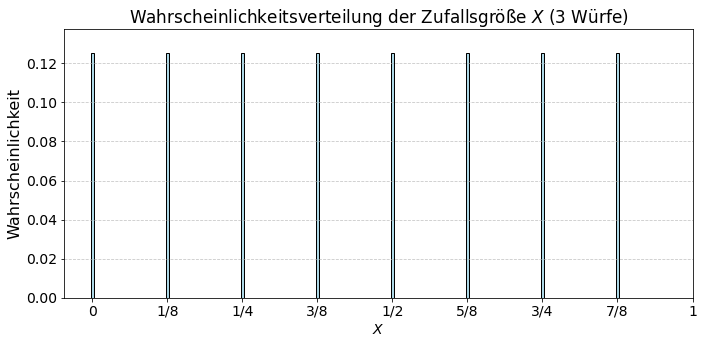

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from fractions import Fraction

def calculate_probabilities(n):
    outcomes = np.arange(2**n)
    probabilities = np.zeros(2**n)
    for outcome in outcomes:
        binary_outcome = bin(outcome)[2:].zfill(n)
        x_value = sum(int(bit) / 2**(i+1) 
                      for i, bit in enumerate(binary_outcome))
        probabilities[outcome] = x_value
    unique, counts = np.unique(probabilities, return_counts=True)
    probabilities = counts / 2**n
    return unique, probabilities

# Eingaben
n = 3   # Anzahl der Würfe (Vorsicht: Es gibt 2^n Ergebnisse; Tipp: n<10)

# Berechne die Wahrscheinlichkeiten
x_values, probabilities = calculate_probabilities(n)

# Schriftgröße für alle Beschriftungen erhöhen
plt.rcParams.update({'font.size': 14})

# Erstelle das Balkendiagramm
plt.figure(figsize=(10, 5))
plt.bar(x_values, probabilities, width=0.005, align='center', color='lightblue', edgecolor='black')

# Bedingung für die Darstellung der x-Ticks
if n < 5:
    # Brüche für die x-Labels berechnen und anwenden
    x_ticks = np.linspace(0, 1, 2**n + 1)
    x_labels = [str(Fraction(x).limit_denominator()) for x in x_ticks]
    plt.xticks(x_ticks, x_labels)
else:
    # Dezimalwerte verwenden, wenn n >= 5
    plt.xticks(np.linspace(0, 1, 11), np.round(np.linspace(0, 1, 11), 2))

# Beschriftungen und Titel
plt.xlabel('$X$')
plt.ylabel('Wahrscheinlichkeit',fontsize=16)
plt.title(f'Wahrscheinlichkeitsverteilung der Zufallsgröße $X$ ({n} Würfe)')
plt.ylim(0, max(probabilities) * 1.1)

# Anzeige des Diagramms
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# Speichern des Bildes
plt.savefig("Wahrscheinlichkeitsverteilung.png", format="png", dpi=300)  # Speichern als PNG
plt.show()